In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/m3-all/M3C.xls


In [2]:
pip install xlrd

     |████████████████████████████████| 96 kB 376 kB/s            
Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings
warnings.filterwarnings('ignore')
#warnings.warn('DelftStack')
#warnings.warn('Do not show this message')

In [4]:
df_year =pd.read_excel("/kaggle/input/m3-all/M3C.xls",sheet_name='M3Year')
df_month =pd.read_excel("/kaggle/input/m3-all/M3C.xls",sheet_name='M3Month')
df_quart =pd.read_excel("/kaggle/input/m3-all/M3C.xls",sheet_name='M3Quart')
df_other =pd.read_excel("/kaggle/input/m3-all/M3C.xls",sheet_name='M3Other')

In [5]:
df_month

,Series,N,NF,Category,Starting Year,Starting Month,1,2,3,4,...,135,136,137,138,139,140,141,142,143,144
0,N1402,68,18,MICRO,1990,1,2640.0,2640.0,2160.0,4200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N1403,68,18,MICRO,1990,1,1680.0,1920.0,120.0,1080.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N1404,68,18,MICRO,1990,1,1140.0,720.0,4860.0,1200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N1405,68,18,MICRO,1990,1,180.0,940.0,2040.0,800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N1406,68,18,MICRO,1990,1,2000.0,1550.0,4450.0,3050.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,N2825,71,18,OTHER,0,0,3295.5,3301.9,3244.6,3221.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1424,N2826,71,18,OTHER,0,0,4922.8,4924.5,4960.9,4930.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1425,N2827,71,18,OTHER,0,0,4142.8,4096.0,4074.8,4015.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1426,N2828,71,18,OTHER,0,0,3004.6,2983.4,2983.4,2974.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_quart

,Series,N,NF,Category,Starting Year,Starting Quarter,1,2,3,4,...,63,64,65,66,67,68,69,70,71,72
0,N 646,44,8,MICRO,1984,1,3142.63,3190.75,3178.69,3170.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N 647,44,8,MICRO,1984,1,1522.00,1537.80,1602.60,1697.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N 648,46,8,MICRO,1983,3,1549.72,1615.08,1620.33,1634.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N 649,44,8,MICRO,1984,1,2182.60,2189.80,2136.70,2155.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N 650,44,8,MICRO,1984,1,875.51,917.23,999.89,1014.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,N1397,48,8,DEMOGRAPHIC,1964,1,985.00,1740.00,1800.00,3340.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
752,N1398,48,8,DEMOGRAPHIC,1964,1,5920.00,5980.00,6045.00,6080.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
753,N1399,48,8,DEMOGRAPHIC,1964,1,3550.00,2545.00,2000.00,2150.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
754,N1400,48,8,DEMOGRAPHIC,1964,1,6590.00,6600.00,6610.00,6730.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_year

,Series,N,NF,Category,Starting Year,Unnamed: 5,1,2,3,4,...,38,39,40,41,42,43,44,45,46,47
0,N 1,20,6,MICRO,1975,1,940.66,1084.86,1244.98,1445.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N 2,20,6,MICRO,1975,1,1991.05,2306.40,2604.00,2992.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N 3,20,6,MICRO,1975,1,1461.57,1692.50,2193.82,2459.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N 4,20,6,MICRO,1975,1,744.54,1105.16,1417.40,1838.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N 5,20,6,MICRO,1975,1,4977.18,5248.00,5370.00,6184.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,N 641,36,6,OTHER,1811,1,5980.00,4970.00,5020.00,3820.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641,N 642,36,6,OTHER,1847,1,4950.00,6610.00,6860.00,6460.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
642,N 643,36,6,OTHER,1883,1,5700.00,4420.00,5900.00,6810.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,N 644,36,6,OTHER,1919,1,6480.00,5470.00,2790.00,7570.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
train_y_list = []
test_y_list = []
for i in range(df_year.shape[0]):
    forcast_horizon = df_year.iloc[i,2]
    length = df_year.iloc[i,1]
    train_y_list.append(df_year.iloc[i,6:6+length-forcast_horizon])
    test_y_list.append(df_year.iloc[i,6+length-forcast_horizon:6+length])
    #return train_y_list, test_y_list    

In [9]:
def train_test_series(df):
    train_y_list = []
    test_y_list = []
    for i in range(df.shape[0]):
        forcast_horizon = df.iloc[i,2]
        length = df.iloc[i,1]
        train_y_list.append(df.iloc[i,6:6+length-forcast_horizon].astype(np.float64))
        test_y_list.append(df.iloc[i,6+length-forcast_horizon:6+length].astype(np.float64))
    return train_y_list, test_y_list    
        
    

In [10]:
test_y_list[0]

15    5379.75
16    6158.68
17    6876.58
18    7851.91
19    8407.84
20    9156.01
Name: 0, dtype: object

In [11]:
train_m_list, test_m_list = train_test_series(df_month)

In [12]:
for i in train_y_list:
    i.astype(np.float64)
for i in test_y_list:
    i.astype(np.float64)    

In [13]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

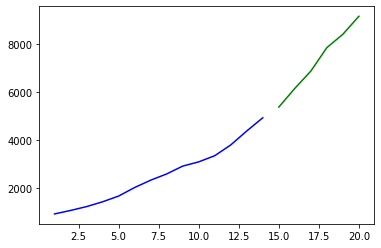

In [14]:
import matplotlib.pyplot as plt
plt.plot(train_y_list[0],color = 'blue')
plt.plot( test_y_list[0],color = 'green')

plt.show()

In [15]:
def SMAPE(y,yhat):
    y, yhat = np.array(y), np.array(yhat)
    new = (np.abs(yhat) + np.abs(y))
    smap=2*np.abs(y-yhat)/new
    smap_final = np.mean(smap)
    return 100*smap_final

def RMSE(y, yhat):
    y, yhat = np.array(y), np.array(yhat)
    return np.sqrt(np.mean(np.square(y - yhat)))

def MAE(y,yhat):
    y, yhat = np.array(y), np.array(yhat)
    mae = np.mean(np.abs(y - yhat))
    return mae

def msMAPE(y,yhat):
    epsilon = 0.1  
    y, yhat = np.array(y), np.array(yhat)
    comparator = np.zeros((y.shape[0],))+epsilon
    sum_1 = np.maximum(comparator, (abs(y) + abs(yhat) + epsilon))
    msmape = 2 * abs(y -yhat ) / (sum_1)
    return 100*np.mean(msmape)

def MASE(training_series, testing_series, prediction_series,S):
    y_train = np.array(training_series)
    y_test = np.array(testing_series)
    yhat = np.array(prediction_series)
    n1 = y_train.shape[0]
    d = (np.abs(np.diff(y_train,n=S)).sum())/(n1-S)
    errors = np.abs(y_test - yhat )
    return np.mean(errors)/d

In [16]:
p=np.asarray(train_y_list[0])

(14,)
(6,)


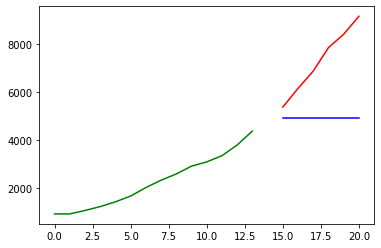

In [17]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
fit1 = SimpleExpSmoothing(p).fit(optimized=True)
fcast1 = fit1.forecast(test_y_list[0].shape[0])
pred=pd.Series(fcast1) 
pred.index = test_y_list[0].index
plt.plot(fit1.fittedvalues,color='green')
plt.plot(test_y_list[0],color='red')
plt.plot(pred,color='blue')
print(fit1.fittedvalues.shape)
print(fcast1.shape)

#fit3 = SimpleExpSmoothing(p).fit()
#fcast3 = fit3.forecast(test_y_list[0].shape[0]).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
# plot
#fcast3.plot(color='green', legend=True)
#fit3.fittedvalues.plot(color='green')

#plt.show()

In [18]:
MASE(train_y_list[0],test_y_list[0],fcast1,1)

7.712496163638407

In [19]:
from statsmodels.tsa.api import ExponentialSmoothing
def SES(train_y_list,test_y_list):
    smape_list = []
    mase_list = []
    rmse_list = []
    mae_list =[]
    msmape_list = []
    for i in range(len(train_y_list)):
        fit1 = SimpleExpSmoothing(np.asarray(train_y_list[i])).fit() 
        fcast1 = fit1.forecast(test_y_list[i].shape[0])
        smape_list.append(SMAPE(test_y_list[i],fcast1))
        rmse_list.append(RMSE(test_y_list[i],fcast1))
        mae_list.append(MAE(test_y_list[i],fcast1))
        msmape_list.append(msMAPE(test_y_list[i],fcast1))
        mase_list.append(MASE(train_y_list[i],test_y_list[i],fcast1,1))
    return smape_list, rmse_list, mae_list, msmape_list, mase_list

In [20]:
#l1,l2,l3,l4=Expsmoothing(train_y_list,test_y_list)

In [21]:
def cal_and_print_mean_median(model,smape_list,rmse_list,mae_list,msmape_list,mase_list):
    print(model + "is used, the following are result of mean and median of error list  :")
    print("the mean mase is: " + str(np.mean(mase_list)))
    print("the median mase is: " + str(np.median(mase_list)))
    print("the mean smape is: " + str(np.mean(smape_list)))
    print("the median smape is: " + str(np.median(smape_list)))
    print("the mean rmse is: " + str(np.mean(rmse_list)))
    print("the median rmse is: " + str(np.median(rmse_list)))
    print("the mean mae is: " + str(np.mean(mae_list)))
    print("the median mae is: " + str(np.median(mae_list)))
    print("the mean msmape is: " + str(np.mean(msmape_list)))
    print("the median msmape is: " + str(np.median(msmape_list)))

In [22]:
df_list = [df_month,df_year,df_quart,df_other]
name_list =["Month","Year","Quar","Other"]

In [23]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
for i in range(len(df_list)):
    train_list, test_list =train_test_series(df_list[i])
    l1,l2,l3,l4,l5 =SES(train_list,test_list)
    print("M3 "+str(name_list[i])+" :")
    cal_and_print_mean_median("Exponential", l1,l2,l3,l4,l5)
    
    
    

M3 Month :
Exponentialis used, the following are result of mean and median of error list  :
the mean mase is: 2.5181395186406235
the median mase is: 1.3905514604945384
the mean smape is: 16.277902901539875
the median smape is: 10.858903264506953
the mean rmse is: 897.5245489119872
the median rmse is: 637.2550856929997
the mean mae is: 746.628782183906
the median mae is: 524.2938066201618
the mean msmape is: 16.277654707171042
the median msmape is: 10.858784374683248
M3 Year :
Exponentialis used, the following are result of mean and median of error list  :
the mean mase is: 3.1691306357699878
the median mase is: 2.2534702221250704
the mean smape is: 17.75462397954054
the median smape is: 12.47408975220975
the mean rmse is: 1172.8345456901855
the median rmse is: 803.8794645424367
the mean mae is: 1021.8899922844593
the median mae is: 693.0833399278434
the mean msmape is: 17.75443252630613
the median msmape is: 12.473963597794313
M3 Quar :
Exponentialis used, the following are result of m

In [24]:
from statsmodels.tsa.api import ExponentialSmoothing
def ES(train_y_list,test_y_list):
    smape_list = []
    rmse_list = []
    mae_list =[]
    mase_list =[]
    msmape_list = []
    for i in range(len(train_y_list)):
        fit1 = ExponentialSmoothing(np.asarray(train_y_list[i])).fit() 
        fcast1 = fit1.forecast(test_y_list[i].shape[0])
        smape_list.append(SMAPE(test_y_list[i],fcast1))
        rmse_list.append(RMSE(test_y_list[i],fcast1))
        mae_list.append(MAE(test_y_list[i],fcast1))
        msmape_list.append(msMAPE(test_y_list[i],fcast1))
        mase_list.append(MASE(train_y_list[i],test_y_list[i],fcast1,1))
        
    return smape_list, rmse_list, mae_list, msmape_list, mase_list

In [25]:
#Applying ses on the result
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
for i in range(len(df_list)):
    train_list, test_list =train_test_series(df_list[i])
    l1,l2,l3,l4,l5 =ES(train_list,test_list)
    print("M3 "+str(name_list[i])+" :")
    cal_and_print_mean_median("Exponential", l1,l2,l3,l4,l5)


M3 Month :
Exponentialis used, the following are result of mean and median of error list  :
the mean mase is: 2.5136121363513113
the median mase is: 1.3842738647117605
the mean smape is: 16.205101243781918
the median smape is: 10.70842145004923
the mean rmse is: 891.9074024661677
the median rmse is: 631.63847741007
the mean mae is: 741.0685785829171
the median mae is: 521.0745524843529
the mean msmape is: 16.204853263704027
the median msmape is: 10.708336250023207
M3 Year :
Exponentialis used, the following are result of mean and median of error list  :
the mean mase is: 3.168981517333205
the median mase is: 2.2534702221250704
the mean smape is: 17.754596968837113
the median smape is: 12.431247588259996
the mean rmse is: 1172.023793030588
the median rmse is: 803.7228442733677
the mean mae is: 1022.0439386624768
the median mae is: 706.5191076371135
the mean msmape is: 17.754405570977244
the median msmape is: 12.431032435947147
M3 Quar :
Exponentialis used, the following are result of me

In [26]:
for i in train_y_list:
    i.astype(np.float64)
for i in test_y_list:
    i.astype(np.float64)    

In [27]:
from statsmodels.tsa.arima.model import ARIMA
fit1 = ARIMA(np.asarray(train_y_list[0]).astype(np.float64),order=(1,1,1)).fit()
fcast1 = fit1.forecast(test_y_list[0].shape[0])


In [28]:
fcast1

array([5451.52346814, 5940.75822492, 6405.93816378, 6848.24601806,
       7268.80636819, 7668.68850094])

In [29]:
train_y_list[0]

1      940.66
2     1084.86
3     1244.98
4     1445.02
5     1683.17
6     2038.15
7     2342.52
8     2602.45
9     2927.87
10    3103.96
11    3360.27
12    3807.63
13    4387.88
14    4936.99
Name: 0, dtype: object

In [30]:
'''
from statsmodels.tsa.arima.model import ARIMA
def ARIMA_model(train_y_list,test_y_list):
    smape_list = []
    rmse_list = []
    mae_list =[]
    msmape_list = []
    mase_list =[]
    for i in range(len(train_y_list)):
        fit1=ARIMA(np.asarray(train_y_list[i]).astype(np.float64),order=(1,1,1)).fit()
        fcast1 = fit1.forecast(test_y_list[i].shape[0])
        smape_list.append(SMAPE(test_y_list[i],fcast1))
        rmse_list.append(RMSE(test_y_list[i],fcast1))
        mae_list.append(MAE(test_y_list[i],fcast1))
        msmape_list.append(msMAPE(test_y_list[i],fcast1))
        mase_list.append(MASE(train_y_list[i],test_y_list[i],fcast1,1))
    return smape_list, rmse_list, mae_list, msmape_list, mase_list
'''    

'\nfrom statsmodels.tsa.arima.model import ARIMA\ndef ARIMA_model(train_y_list,test_y_list):\n    smape_list = []\n    rmse_list = []\n    mae_list =[]\n    msmape_list = []\n    mase_list =[]\n    for i in range(len(train_y_list)):\n        fit1=ARIMA(np.asarray(train_y_list[i]).astype(np.float64),order=(1,1,1)).fit()\n        fcast1 = fit1.forecast(test_y_list[i].shape[0])\n        smape_list.append(SMAPE(test_y_list[i],fcast1))\n        rmse_list.append(RMSE(test_y_list[i],fcast1))\n        mae_list.append(MAE(test_y_list[i],fcast1))\n        msmape_list.append(msMAPE(test_y_list[i],fcast1))\n        mase_list.append(MASE(train_y_list[i],test_y_list[i],fcast1,1))\n    return smape_list, rmse_list, mae_list, msmape_list, mase_list\n'

In [31]:
'''
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
for i in range(len(df_list)):
    train_list, test_list =train_test_series(df_list[i])
    l1,l2,l3,l4,l5 =ARIMA_model(train_list,test_list)
    print("M3 "+str(name_list[i])+" :")
    cal_and_print_mean_median("ARIMA", l1,l2,l3,l4,l5)
'''

'\nimport warnings\nwarnings.filterwarnings(\'ignore\')\nwarnings.warn(\'DelftStack\')\nwarnings.warn(\'Do not show this message\')\nfor i in range(len(df_list)):\n    train_list, test_list =train_test_series(df_list[i])\n    l1,l2,l3,l4,l5 =ARIMA_model(train_list,test_list)\n    print("M3 "+str(name_list[i])+" :")\n    cal_and_print_mean_median("ARIMA", l1,l2,l3,l4,l5)\n'

In [32]:
train_y_list[0]

1      940.66
2     1084.86
3     1244.98
4     1445.02
5     1683.17
6     2038.15
7     2342.52
8     2602.45
9     2927.87
10    3103.96
11    3360.27
12    3807.63
13    4387.88
14    4936.99
Name: 0, dtype: object

In [33]:
pip install tbats

     |████████████████████████████████| 43 kB 109 kB/s            
     |████████████████████████████████| 1.4 MB 484 kB/s            
Note: you may need to restart the kernel to use updated packages.


In [34]:
'''
from tbats import TBATS, BATS
estimator = TBATS()
model = estimator.fit(train_y_list[0].astype(np.float64))
y_forecast = model.forecast(test_y_list[0].shape[0])
'''

'\nfrom tbats import TBATS, BATS\nestimator = TBATS()\nmodel = estimator.fit(train_y_list[0].astype(np.float64))\ny_forecast = model.forecast(test_y_list[0].shape[0])\n'

In [35]:
#y_forecast, test_y_list[0]

In [36]:
def TBATSS(train_y_list,test_y_list):
    smape_list = []
    rmse_list = []
    mae_list =[]
    msmape_list = []
    for i in range(len(train_y_list)):
       # fit1 = ThetaModel(np.asarray(train_y_list[i])).fit()
       y_to_test=np.asarray(train_y_list[i]) 
       estimator = TBATS()
       model = estimator.fit(train_y_list[i].astype(np.float64))
        # Forecast 365 days ahead
       y_forecast = model.forecast(test_y_list[i].shape[0])
       #y_forecast = fit1.forecast(test_y_list[i].shape[0])
       smape_list.append(SMAPE(test_y_list[i],y_forecast))
       rmse_list.append(RMSE(test_y_list[i],y_forecast))
       mae_list.append(MAE(test_y_list[i],y_forecast))
       msmape_list.append(msMAPE(test_y_list[i],y_forecast))
    return smape_list, rmse_list, mae_list, msmape_list

In [37]:
#for i in range(train_list)
#train_list[0].isna().sum()

In [38]:
'''
for i in range(len(df_list)):-
    train_list, test_list =train_test_series(df_list[i])
    l1,l2,l3,l4,l5 =TBATSS(train_list,test_list)
    print("M3 "+str(name_list[i])+" :")
    cal_and_print_mean_median("TBATS", l1,l2,l3,l5)
'''    

'\nfor i in range(len(df_list)):-\n    train_list, test_list =train_test_series(df_list[i])\n    l1,l2,l3,l4,l5 =TBATSS(train_list,test_list)\n    print("M3 "+str(name_list[i])+" :")\n    cal_and_print_mean_median("TBATS", l1,l2,l3,l5)\n'

In [41]:
train_y_list[1].astype(np.float64)

1     1991.05
2     2306.40
3     2604.00
4     2992.30
5     3722.08
6     5226.62
7     5989.46
8     5614.62
9     5527.00
10    5389.80
11    5384.40
12    3656.20
13    4034.80
14    4230.00
Name: 1, dtype: float64

In [42]:
train_y_list[1].values.reshape(-1,1)

array([[1991.05],
       [2306.4],
       [2604.0],
       [2992.3],
       [3722.08],
       [5226.62],
       [5989.46],
       [5614.62],
       [5527.0],
       [5389.8],
       [5384.4],
       [3656.2],
       [4034.8],
       [4230.0]], dtype=object)

In [43]:
df=train_y_list[1].to_frame()

In [44]:
p1=df_year.iloc[0:1,6:20]


In [45]:
p1

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,940.66,1084.86,1244.98,1445.02,1683.17,2038.15,2342.52,2602.45,2927.87,3103.96,3360.27,3807.63,4387.88,4936.99


In [46]:
def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

In [47]:
def create_input_matrix(train_list,lag):
    
    embeded_train = np.asarray([]).reshape((0,lag+1))
    final_lags=np.asarray([]).reshape((0,lag))
    series_mean =[]
  #embeded_test = np.asarray([])
    for i in range(len(train_list)):
        train_list[i]=train_list[i].astype(np.float64)
    #test_list[i]=test_list[i].astype(np.float64)
    #mean=pd.concat((train_list[i],test_list[i])).mean()
        mean = train_list[i].mean()
        series_mean.append(mean)
        norm_train= train_list[i]/mean
    #norm_test = test_list[i]/mean
        embed=rolling_window(np.array(norm_train), lag+1)[:, ::-1]
        #print(embed)

        embeded_train = np.concatenate((embeded_train,embed),axis=0)   
    #final_lag = np.array(train_list[i][:lag:-1]).T
        final_lag = np.array(norm_train[-lag:][::-1])
        final_lag = final_lag.reshape((-1,lag))
        #print(final_lag.shape)
        final_lags = np.concatenate((final_lags,final_lag),axis=0)

    p4= pd.DataFrame(embeded_train)
    final_lags_pd = pd.DataFrame(final_lags)
    p4.columns = ['lag'+str(col_name) for col_name in p4.columns]
    final_lags_pd.columns = ['lag'+str(col_name+1) for col_name in final_lags_pd.columns]
    return p4, final_lags_pd, series_mean

In [103]:
 p,k,d =  create_input_matrix(train_m_list,3)

In [49]:

pip install git+https://github.com/madrury/py-glm.git

  Cloning https://github.com/madrury/py-glm.git to /tmp/pip-req-build-0i4w6ma3
  Running command git clone --filter=blob:none -q https://github.com/madrury/py-glm.git /tmp/pip-req-build-0i4w6ma3
  Resolved https://github.com/madrury/py-glm.git to commit 83081444e2cbba4d94f9e6b85b6be23e0ff600b8
  Preparing metadata (setup.py) ... done
  Created wheel for py-glm: filename=py_glm-0.0.1-py3-none-any.whl size=16034 sha256=1205099fcc2c3babfa366f12f7efd68c31efc7381f28d10161187a1853aa7ab4
  Stored in directory: /tmp/pip-ephem-wheel-cache-72043pwl/wheels/3c/55/40/f95fda234109c19895938acde69c5c38dafd71b9b0b6360e77
Successfully built py-glm
Note: you may need to restart the kernel to use updated packages.


In [104]:
from glm.glm import GLM
from glm.families import Gaussian, Bernoulli, Poisson, Exponential
linear_model = GLM(family=Gaussian())

In [105]:
def make_formula(df):
    formula = "lag0 ~ "
    lt =[]
    lt = df.columns
    for i in range(1,len(lt)):
        formula+=str(lt[i])
        if i!=len(lt)-1:
            formula+=" + "
        
    return formula    
        

In [106]:
make_formula(p)

'lag0 ~ lag1 + lag2 + lag3'

In [107]:

linear_model.fit(p, formula=make_formula(p))

In [108]:
y = linear_model.predict(k)

In [57]:

pd.concat((k,pd.DataFrame(y)),axis = 1)

,lag1,lag2,lag3,0
0,1.924945,1.710846,1.484605,1.935788
1,1.009396,0.962816,0.872472,1.041740
2,0.978025,0.903449,0.803849,1.011159
3,1.521174,1.263359,1.022726,1.539883
4,0.984303,0.828592,0.777017,1.023150
...,...,...,...,...
640,1.032101,1.144586,0.970925,1.053351
641,0.933363,0.997040,0.807686,0.956846
642,1.096310,0.865887,1.351935,1.172933
643,0.939956,0.913760,0.898351,0.978216


In [58]:
final_lags = k

In [59]:
final_lags

,lag1,lag2,lag3
0,1.924945,1.710846,1.484605
1,1.009396,0.962816,0.872472
2,0.978025,0.903449,0.803849
3,1.521174,1.263359,1.022726
4,0.984303,0.828592,0.777017
...,...,...,...
640,1.032101,1.144586,0.970925
641,0.933363,0.997040,0.807686
642,1.096310,0.865887,1.351935
643,0.939956,0.913760,0.898351


In [60]:
final_lags = final_lags.iloc[:,:2]

In [61]:
final_lags

,lag1,lag2
0,1.924945,1.710846
1,1.009396,0.962816
2,0.978025,0.903449
3,1.521174,1.263359
4,0.984303,0.828592
...,...,...
640,1.032101,1.144586
641,0.933363,0.997040
642,1.096310,0.865887
643,0.939956,0.913760


In [63]:

final_lags =pd.concat((pd.DataFrame(y),final_lags),axis = 1)
final_lags.columns = ['lag'+str(i+1) for i in range(len(final_lags.columns))]

In [64]:
final_lags

,lag1,lag2,lag3
0,1.935788,1.924945,1.710846
1,1.041740,1.009396,0.962816
2,1.011159,0.978025,0.903449
3,1.539883,1.521174,1.263359
4,1.023150,0.984303,0.828592
...,...,...,...
640,1.053351,1.032101,1.144586
641,0.956846,0.933363,0.997040
642,1.172933,1.096310,0.865887
643,0.978216,0.939956,0.913760


In [66]:
final_lags

,lag1,lag2,lag3
0,1.935788,1.924945,1.710846
1,1.041740,1.009396,0.962816
2,1.011159,0.978025,0.903449
3,1.539883,1.521174,1.263359
4,1.023150,0.984303,0.828592
...,...,...,...
640,1.053351,1.032101,1.144586
641,0.956846,0.933363,0.997040
642,1.172933,1.096310,0.865887
643,0.978216,0.939956,0.913760


In [67]:
 '''
    for (i in 1:forecast_horizon){
    # Get predictions for the current horizon
    if(method == "pooled_regression")
      new_predictions <- predict.glm(object = model, newdata = as.data.frame(final_lags)) 
    else if(method == "catboost"){
      catboost_final_lags <- catboost.load_pool(final_lags)
      new_predictions <- catboost.predict(model, catboost_final_lags)
    }
    
    # Adding the current forecasts to the final predictions matrix
    predictions <- cbind(predictions, new_predictions)
    
    # Updating the test set for the next horizon
    if(i < forecast_horizon){
      final_lags <- final_lags[-lag]
      final_lags <- cbind(new_predictions, final_lags)
      colnames(final_lags)[1:lag] <- paste("Lag", 1:lag, sep="")
      final_lags <- as.data.frame(final_lags)
    }
  }
  
  # Renormalise the predictions
  true_predictions <- predictions * as.vector(series_means)
  true_predictions
  '''

'\n   for (i in 1:forecast_horizon){\n   # Get predictions for the current horizon\n   if(method == "pooled_regression")\n     new_predictions <- predict.glm(object = model, newdata = as.data.frame(final_lags)) \n   else if(method == "catboost"){\n     catboost_final_lags <- catboost.load_pool(final_lags)\n     new_predictions <- catboost.predict(model, catboost_final_lags)\n   }\n   \n   # Adding the current forecasts to the final predictions matrix\n   predictions <- cbind(predictions, new_predictions)\n   \n   # Updating the test set for the next horizon\n   if(i < forecast_horizon){\n     final_lags <- final_lags[-lag]\n     final_lags <- cbind(new_predictions, final_lags)\n     colnames(final_lags)[1:lag] <- paste("Lag", 1:lag, sep="")\n     final_lags <- as.data.frame(final_lags)\n   }\n }\n \n # Renormalise the predictions\n true_predictions <- predictions * as.vector(series_means)\n true_predictions\n '

In [70]:
def get_vals(lag, model, final_lags, forecast_horizon, series_means):
    pred_list = np.asarray([]).reshape((final_lags.shape[0],0))
    #print(pred_list.shape)
    for i in range(forecast_horizon):
        #print(final_lags) 
        new_pred = model.predict(final_lags)
        temp =new_pred.reshape((final_lags.shape[0],1))
        #print(new_pred)
        pred_list = np.concatenate((pred_list,temp),axis = 1)
        if i<forecast_horizon-1:
          
            final_lags = final_lags.iloc[:,:lag-1]
            final_lags =pd.concat((pd.DataFrame(new_pred),final_lags),axis = 1)
            final_lags.columns = ['lag'+str(i+1) for i in range(len(final_lags.columns))]
          
    #print(pred_list) 
    #s= np.array(series_means).reshape(pred_list.shape[0],pred_list.shape[1])
    return pred_list      
        
        
    
    


In [111]:
test_m_list[0].shape

(18,)

In [112]:
y=get_vals(3,linear_model,k,18,d)

In [72]:
p=np.array([1,2,3,4])

In [114]:
for i in range(y.shape[1]):
    y[:,i] = y[:,i]*np.array(d)

In [115]:
y

array([[3181.66212414, 3054.87640551, 3147.06082092, ..., 3602.29811685,
        3611.20039881, 3618.75954755],
       [1150.18442638, 1159.31646906, 1197.3675579 , ..., 1568.70388983,
        1575.90429286, 1582.01831515],
       [5577.77721004, 5445.97012644, 5135.52614783, ..., 4107.5781549 ,
        4086.06200316, 4067.79251531],
       ...,
       [2704.1330024 , 2782.70788616, 2856.14493791, ..., 3246.5632809 ,
        3254.48014337, 3261.20243688],
       [2916.76885534, 2929.72611127, 2941.97827926, ..., 3014.12545373,
        3015.57676262, 3016.80908739],
       [1666.12549848, 1723.79815172, 1779.7588483 , ..., 2083.71706526,
        2089.86641611, 2095.08790015]])

In [117]:
from glm.glm import GLM
from glm.families import Gaussian, Bernoulli, Poisson, Exponential
linear_model = GLM(family=Gaussian())
for i in range(len(df_list)):
    train_list, test_list =train_test_series(df_list[i])
    p,k,d =  create_input_matrix(train_list,3)
    linear_model.fit(p, formula=make_formula(p))
    y = get_vals(3,linear_model,k,test_list[0].shape[0],d)
    for j in range(y.shape[1]):
        y[:,j] = y[:,j]*np.array(d)
    #print(y.shape,test_list[0].shape)    
    l1,l2,l3,l4,l5=PL(y,test_list,train_list)
   
    print("M3 "+str(name_list[i])+" :")
    cal_and_print_mean_median("PoolRegression", l1,l2,l3,l4,l5)

M3 Month :
PoolRegressionis used, the following are result of mean and median of error list  :
the mean mase is: 17.118875099804978
the median mase is: 5.374492966984547
the mean smape is: 23.456556248858618
the median smape is: 17.349335310909957
the mean rmse is: 1245.5526419454377
the median rmse is: 924.5116118635617
the mean mae is: 1094.9054892462223
the median mae is: 812.9192747670972
the mean msmape is: 23.456228656006125
the median msmape is: 17.34918959620101
M3 Year :
PoolRegressionis used, the following are result of mean and median of error list  :
the mean mase is: 11.199180092326447
the median mase is: 7.491272831441127
the mean smape is: 18.448210064571786
the median smape is: 13.725519698175523
the mean rmse is: 1236.993693577038
the median rmse is: 970.948659358759
the mean mae is: 1071.2870523848758
the median mae is: 824.6944482029227
the mean msmape is: 18.44801282045693
the median msmape is: 13.725407474968346
M3 Quar :
PoolRegressionis used, the following are re

In [96]:
from statsmodels.tsa.api import ExponentialSmoothing
def PL(yhat,test_y_list,train_y_list):
    smape_list = []
    rmse_list = []
    mae_list =[]
    mase_list =[]
    msmape_list = []
    for i in range(yhat.shape[0]):
        smape_list.append(SMAPE(test_y_list[i],yhat[i,:]))
        rmse_list.append(RMSE(test_y_list[i],yhat[i,:]))
        mae_list.append(MAE(test_y_list[i],yhat[i,:]))
        msmape_list.append(msMAPE(test_y_list[i],yhat[i,:]))
        mase_list.append(MASE(train_y_list[i],test_y_list[i],yhat[i:],1))

        
        
        
        
    return smape_list, rmse_list, mae_list, msmape_list, mase_list

In [97]:
l1,l2,l3,l4,l5=PL(y,test_y_list,train_y_list)

In [98]:
cal_and_print_mean_median('pooled regression',l1,l2,l3,l4,l5)

pooled regressionis used, the following are result of mean and median of error list  :
the mean mase is: 11.199180092326445
the median mase is: 7.491272831441124
the mean smape is: 18.448210064571786
the median smape is: 13.725519698175523
the mean rmse is: 1236.993693577038
the median rmse is: 970.948659358759
the mean mae is: 1071.2870523848758
the median mae is: 824.6944482029227
the mean msmape is: 18.44801282045693
the median msmape is: 13.725407474968346
